In [1]:

import pandas as pd

# Load the dataset to inspect its structure

data = pd.read_csv('/content/spam_ham_dataset.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load and prepare the dataset
data = pd.read_csv('/content/spam_ham_dataset.csv')

# Step 2: Split the dataset into features (X) and labels (y)
X = data['text']  # Text data (email content)
y = data['label_num']  # Labels (0 for ham, 1 for spam)

# Step 3: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)  # Convert text to numerical features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 5: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test_tfidf)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Displaying the results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

Accuracy: 0.9903381642512077

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



<ipython-input-4-9cc50f79f36d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


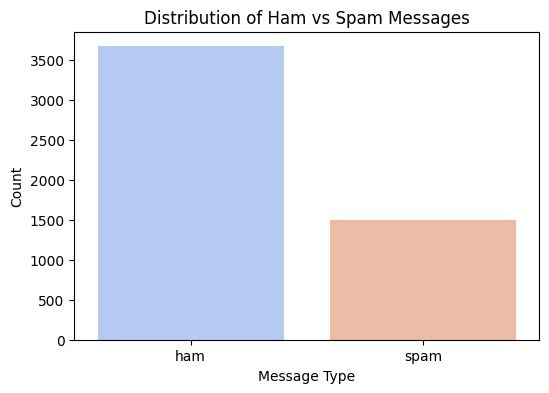

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of ham and spam messages
class_counts = data['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.title('Distribution of Ham vs Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


In [5]:
pip install wordcloud


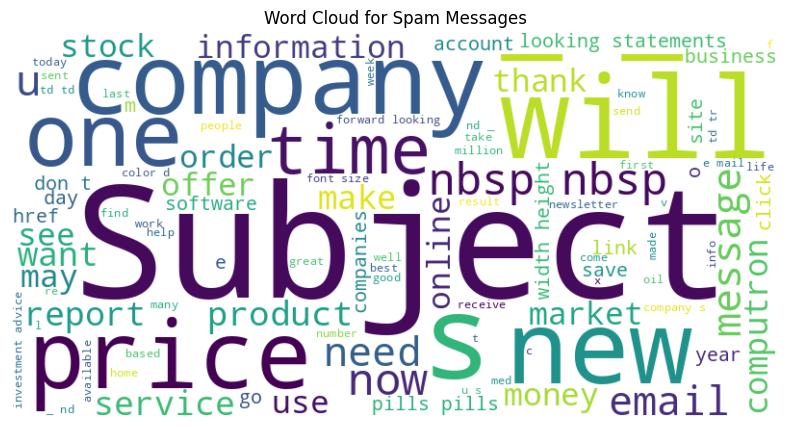

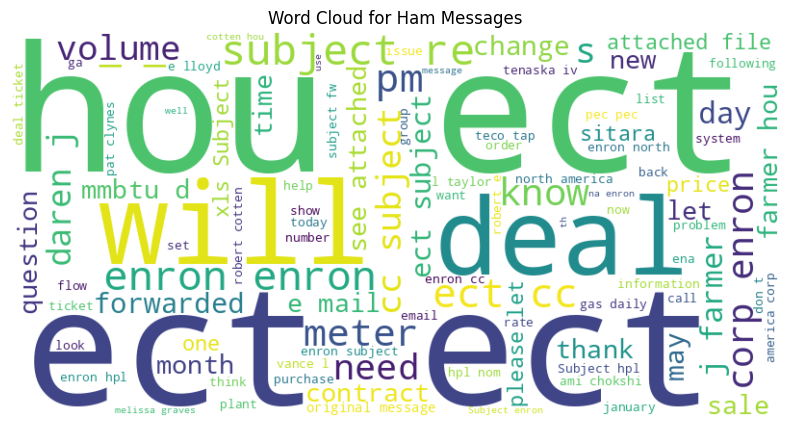

In [6]:
from wordcloud import WordCloud

# Function to create a word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Create word clouds for spam and ham messages
spam_text = " ".join(data[data['label'] == 'spam']['text'])
ham_text = " ".join(data[data['label'] == 'ham']['text'])

create_wordcloud(spam_text, "Word Cloud for Spam Messages")
create_wordcloud(ham_text, "Word Cloud for Ham Messages")
